# **0. Importación de librerías, definición de funciones y carga de datos**

> ## ***Librerías***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # visualización
from wordcloud import WordCloud # visualización

import nltk # exploración y preprocesado
from nltk import ngrams # exploración
from nltk.probability import FreqDist # exploracion
from nltk.corpus import stopwords # preprocesado
from nltk.stem import WordNetLemmatizer # preprocesado
from nltk.tokenize import word_tokenize # preprocesado
# Descarga de recursos de NLTK necesarios para preprocesado
nltk.download('punkt') # para tokenización
nltk.download('stopwords') # tratamiento de stopwords
nltk.download('wordnet') # lematización

import string # preprocesado de las puntuaciones

# Para preprocesar las contracciones del inglés
!pip install contractions
import contractions

# Para preprocesar las etiquetas HTML presentes en el texto
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.7 MB/s eta 0:00:00


> ## ***Funciones***

In [2]:
def plot_word_cloud(text):
  wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
  plt.figure(figsize=(12,6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()
def show_ngrams(tokens, n):
  ngramas = list(ngrams(tokens, n))
  ng_freq = FreqDist(ngramas)
  ng_freq_most_common = ng_freq.most_common(10)
  ngs_ = [str(ng[0]) for ng in ng_freq_most_common]
  ngs_f_ = [ng[1] for ng in ng_freq_most_common]
  ngs_f_, ngs_ = zip(*sorted(zip(ngs_f_, ngs_)))
  plt.barh(ngs_, ngs_f_)
  plt.title(f'Frecuencia de los {n}-gramas más comunes')
  plt.ylabel(f'{n}-gramas')
  plt.xlabel(f'Frecuencia')
  plt.show()

> ## ***Carga del corpus***

In [3]:
corpus_reviews = pd.read_csv('./sampled_data_file.csv') # Archivo descargado del notebook 1
corpus_reviews.sample(5)

,overall,reviewText
77639,5.0,Loved it.
35132,2.0,Purchased on 12/11/2016 and the phone stopped ...
4453,1.0,It is plastic not aluminum. It wouldn't protec...
5816,1.0,Thought I hit a bargain hunter's jackpot with ...
46383,4.0,"I bought three different car phone mounts, sin..."


*.**Disclaimer:** para poner en evidencia el proceso que llevo desde el principio del notebook hasta el final que mostraré el pipeline de todo el preprocesamiento, dejaré las nuevas funciones usadas en cada parte correspondiente, entendiendo que de ser un caso real, deben ir en el espacio de 'funciones' que les separé arriba*

# **1. Tokenización**

> ## ***Tratamiento de contracciones gramaticales***

In [4]:
def no_contractions(text):
  """
  Función que sirve para expandir las contracciones que se encuentren en el texto

  Parámetros:
  - text (str): Texto a analizar

  Retorna:
  - text (str): Texto ya procesado sin contracciones gramaticales
  """
  # De lo que se encarga la función 'fix()' de la librería contractions es de:
  # tomar como parámetro el string a analizar, luego busca contracciones como
  # "can't" y la convierte en "cannot". El resultado es otra cadena de texto
  # ya con el texto procesado sin contracciones
  text = contractions.fix(text)

  return text

In [5]:
import random
# Creo una columna 'no_contractions' en mi dataframe con los resultados respectivos de la función aplicada
corpus_reviews['no_contractions'] = corpus_reviews['reviewText'].apply(no_contractions)

n_review = random.randint(0,79999)

print(corpus_reviews['reviewText'].iloc[n_review]), print(corpus_reviews['no_contractions'].iloc[n_review])

I purchased this item... which is no longer needed.. but if I return it , I will only be refunded 2.00. Go figure
I purchased this item... which is no longer needed.. but if I return it , I will only be refunded 2.00. Go figure


(None, None)

> ## ***Tratamiento de etiquetas HTML***

In [6]:
def no_html_tags(text):
  """
  Función que elimina toda etiqueta HTML de un texto

  Parámetros:
  - text (srt): Texto a procesar

  Retorna:
  - text (str): Texto ya procesado
  """
  # La función 'BeautifulSoup()' sirve para analizar el texto que se le ponga
  # como primer parámetro, el segundo parámetro es el tipo de análisis que se
  # le hará al texto. 'html.parser' es la opción normalmente más usada
  text = BeautifulSoup(text, 'html.parser').get_text()

  return text

In [7]:
# Creo una columna 'no_tags' en mi dataframe con los resultados respectivos de la función aplicada
corpus_reviews['no_tags'] = corpus_reviews['no_contractions'].apply(no_contractions)

n_review = random.randint(0,79999)

print(corpus_reviews['no_contractions'].iloc[n_review]), print(corpus_reviews['no_tags'].iloc[n_review])

Ok
Ok


(None, None)

> ## ***Tokenización***

In [8]:
def tokenize(text):
  """
  Función que tokeniza el texto a nivel de palabras

  Parámetros:
  - text (str): Texto a tokenizar

  Retorna:
  - tokens (list): lista de tokens
  """
  # Se usa el 'word_tokenize' de NLTK para obtener una tokenización más avanzada que split()
  tokens = word_tokenize(text)

  return tokens

In [9]:
# Creo una columna 'tokenized' en mi dataframe con cada una de las tokenizaciones respectivas a su fila
corpus_reviews['tokenized'] = corpus_reviews['no_tags'].apply(tokenize)

print(corpus_reviews['no_tags'].iloc[5000]), print(corpus_reviews['tokenized'].iloc[5000])

DID NOT WORK
['DID', 'NOT', 'WORK']


(None, None)

# **2. Normalización**

In [10]:
def lower(tokens):
  """
  Función que convierte todos los tokens a minúsculas

  Parámetros:
  - tokens (list): lista de tokens

  Retorna:
  - lower_tokens (list): lista de tokens en minúscula
  """
  lower_tokens = []

  for token in tokens:
    lower_tokens.append(token.lower())

  return lower_tokens

In [11]:
# Creo una columna 'lower' que me representará los tokens normalizados en minúsculas
corpus_reviews['lower'] = corpus_reviews['tokenized'].apply(lower)

print(corpus_reviews['tokenized'].iloc[5000]), print(corpus_reviews['lower'].iloc[5000])

['DID', 'NOT', 'WORK']
['did', 'not', 'work']


(None, None)

# **3. Eliminar puntuaciones**

In [12]:
def remove_punctuation(lower_tokens):
    """
    Funcion que elimina todos los signos de puntuación de la lista de tokens

    Parámetros:
    - lower_tokens (list): Lista de tokens.

    Retorna:
    - tokens (list): Lista de tokens sin signos de puntuación.
    """
    tokens = []

    for token in lower_tokens:
      if token not in string.punctuation:
        tokens.append(token)

    return tokens

In [13]:
# Creo una columna 'no_punctuation' que me representará los tokens sin puntuaciones
corpus_reviews['no_punctuation'] = corpus_reviews['lower'].apply(remove_punctuation)

print(corpus_reviews['lower'].iloc[79999]), print(corpus_reviews['no_punctuation'].iloc[79999])

['i', 'love', 'my', 'tripod', '.', 'great', 'for', 'doing', 'selfie', 'videos', '.']
['i', 'love', 'my', 'tripod', 'great', 'for', 'doing', 'selfie', 'videos']


(None, None)

# **4. Eliminar stopwords**

In [14]:
def remove_stopwords(tokens):
  """
  Función que elimina las stopwords de la lista de tokens

  Parámetros:
  - tokens (list): Lista de tokens

  Retorna:
  - no_stopwords (list): Lista de tokens sin stopwords.
  """
  # El '.words()' contiene las stopwords de ciertos lenguajes.
  stop_words = stopwords.words('english')
  no_stopwords = []

  for token in tokens:
    if token not in stop_words:
      no_stopwords.append(token)

  return no_stopwords

In [15]:
# Creo una columna 'no_stopwords' que me representará los tokens sin stopwords
corpus_reviews['no_stopwords'] = corpus_reviews['no_punctuation'].apply(remove_stopwords)

print(corpus_reviews['no_punctuation'].iloc[79999]), print(corpus_reviews['no_stopwords'].iloc[79999])

['i', 'love', 'my', 'tripod', 'great', 'for', 'doing', 'selfie', 'videos']
['love', 'tripod', 'great', 'selfie', 'videos']


(None, None)

# **5. Lematización**

In [16]:
def lemmatize(tokens):
    """
    Aplica lemmatization a los tokens para obtener el lema de cada palabra.

    Parámetros:
    - tokens (list): Lista de tokens.

    Retorna:
    - lemmas (list): Lista de tokens lematizados.
    """
    # 'WordNetLemmatizer()' sirve para extraer de los token, los lemas correspondientes
    lemmatizer = WordNetLemmatizer()
    lemmas = []

    for token in tokens:
      lemmas.append(lemmatizer.lemmatize(token))

    return lemmas

In [17]:
# Creo una columna 'lemmatized' que me representará los tokens lematizados
corpus_reviews['lemmatized'] = corpus_reviews['no_stopwords'].apply(lemmatize)

print(corpus_reviews['no_stopwords'].iloc[79999]), print(corpus_reviews['lemmatized'].iloc[79999])

['love', 'tripod', 'great', 'selfie', 'videos']
['love', 'tripod', 'great', 'selfie', 'video']


(None, None)

# **6. Comparación**

In [18]:
import random
# Hago una función lambda que vuelva a unir todos los tokens en un solo string
# para poder agarrar muestras aleatorias y comprobar la integridad de lo realizado
corpus_reviews['preprocessed'] = corpus_reviews['lemmatized'].apply(lambda x: ' '.join(x))

n_review = random.randint(0,79999)

print(corpus_reviews['reviewText'].iloc[n_review]), print(corpus_reviews['preprocessed'].iloc[n_review])

I do not like the fit into the holster. I had the same style case/holster for my S4 and loved it. I got this for my new droid turbo and it feels like junk. I do not use the holster because it felt so bad. I did continue to use the case which does fit the phone nicely. The kickstand broke off in a few weeks. and a few weeks later the thin spot between the volume and power buttons cracked. I am still using the case though. The lack of kickstand was not a big deal and the crack does not really compromise the protection.

I never have verified if mine is official motorola/verizon or a counterfeit/copy

I would not buy again
like fit holster style case/holster s4 loved got new droid turbo feel like junk use holster felt bad continue use case fit phone nicely kickstand broke week week later thin spot volume power button cracked still using case though lack kickstand big deal crack really compromise protection never verified mine official motorola/verizon counterfeit/copy would buy


(None, None)

# **7. Pipeline**

In [19]:
def text_preprocessing(text):
  """
  Esta función preprocesa el texto proporcionado realizando los siguientes pasos:
  - Expande las contracciones gramaticales
  - Se asegura de remover etiquetas HTML
  - Tokeniza los textos
  - Convierte el token a minúsculas
  - Elimina caracteres extraños y signos de puntuación
  - Elimina stopwords
  - Hace lematización

  Parámetros:
  - text (srt): El texto a preprocesar.
  Retorna:
  - El texto preprocesado.
  """
  def no_contractions(text):
    return contractions.fix(text)

  def no_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

  def tokenize(text):
    return word_tokenize(text)

  def lower(tokens):
    return [token.lower() for token in tokens]

  def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

  def remove_stopwords(tokens):
    stop_words = stopwords.words('english')
    return [token for token in tokens if token not in stop_words]

  def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

  # Aplicación de las funciones
  text = no_contractions(text)
  text = no_html_tags(text)
  tokens = tokenize(text)
  tokens = lower(tokens)
  tokens = remove_punctuation(tokens)
  tokens = remove_stopwords(tokens)
  tokens = lemmatize(tokens)

  # Union de los tokens ya preprocesados en una cadena de texto separada por ' '
  text = ' '.join(tokens)

  return text

In [20]:
# Carga de los datos
corpus = pd.read_csv('./sampled_data_file.csv')

# Creación de columna la cuál va a recibir el texto ya preprocesado
corpus['preprocessed_review'] = corpus['reviewText'].apply(text_preprocessing)

# Muestreo aleatorio
n_review = random.randint(0,79999)
print(corpus['reviewText'].iloc[n_review]), print(corpus['preprocessed_review'].iloc[n_review])

<ipython-input-19-5cbdaec7e7e9>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()
<ipython-input-19-5cbdaec7e7e9>:21: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


Extremely difficult to apply...removed after 2 days bubbles did not go away. The clarity n brightness on the phone was reduced with this screen protector. I wouldnt recommend it for the S6 Edge.
extremely difficult apply ... removed 2 day bubble go away clarity n brightness phone reduced screen protector would recommend s6 edge


(None, None)

# **8. Cardinalidad del corpus**

In [21]:
all_reviews = " ".join(corpus['preprocessed_review'].astype(str))
tokens = word_tokenize(all_reviews)
unique_words = set(tokens)
print(len(unique_words))

35870


Hay una muy clara mejoría en la cardinalidad, el resultado anterior fue más de 91.000 tokens, respecto a este es una diferencia de más de 55.000 tokens.

# **9. Nube de palabras**

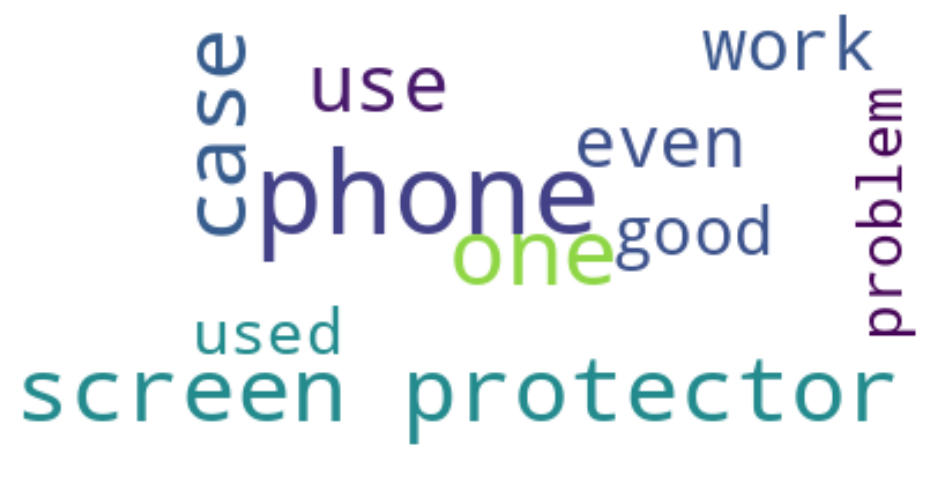

In [22]:
plot_word_cloud(all_reviews)

Esta nube de palabras ahora preprocesada muestra un claro enfoque en términos específicos relacionados con productos/accesorios de celulares como "Screen protector" o "Phone case"

# **10. N-gramas más frecuentes**

> ### ***Bigramas***

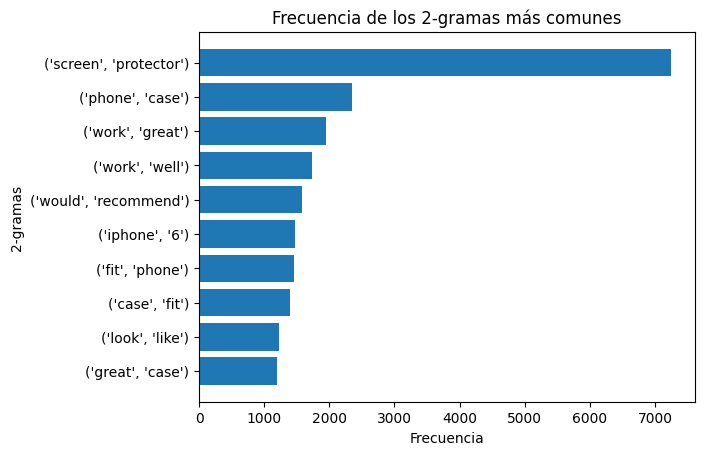

In [23]:
n = 2
show_ngrams(tokens, n)

> ### ***Trigrama***

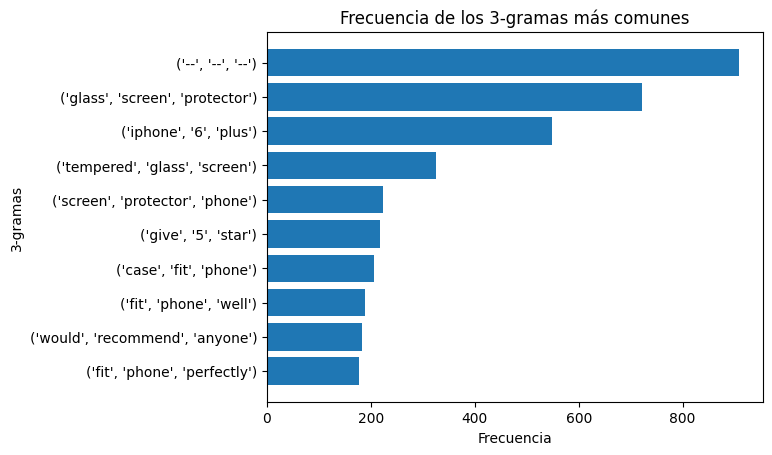

In [24]:
n = 3
show_ngrams(tokens, n)

Los gráficos de los n-gramas tras el preprocesamiento, al igual que la nube de palabras, hacen entender que las reviews tratan sobre accesorios para celulares, enfocándose en protectores de pantalla.

# **11. Proceso iterativo**

Habiendo hecho una primera aproximación al preprocesamiento final, los resultados obtenidos en una primera iteración en los ngramas eran los siguientes:

> ***Bigrama anterior***
<img src=https://i.ibb.co/Mk7Gydk/Bigramas-anterior.png>

> ***Trigrama anterior***
<img src=https://i.ibb.co/p1kFwQL/Trigramas-anterior.png>

Resultados que si bien podrían servir como otra pequeña aproximación, aún contaban con bastante ruido, en especial los trigramas.

Ya una vez todo procesado correctamente, las stopwords y las etiquetas HTML, los nuevos n-gramas dan información mucho más coherente y valiosa.

# **12. Conclusión**

Comparando los resultados obtenidos en este cuaderno respecto al primero, hay una clara mejoría ya justificada. Esto me hace interiorizar la grandísima e innata importancia de preprocesar lo mejor posible, teniendo que explorar cosas no vistas antes y tener siempre las ganas de tener todo hecho perfectamente

Ayudas usadas:

[contractions](https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/)

[beautifulsoup](https://pythoslabs.medium.com/3-ways-to-clean-your-html-text-for-nlp-text-pre-processing-70bc5b876445)

[beautifulsoup](https://oxylabs.io/blog/beautiful-soup-parsing-tutorial)

In [25]:
# Se descarga el dataframe final para su uso posterior

corpus_final = corpus[['overall', 'reviewText', 'preprocessed_review']]

corpus_final.to_csv('preprocessed_data_file.csv', index = False)